<a href="https://colab.research.google.com/github/gitmayanksingh/MachineLearning/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from collections import Counter
import pandas as pd 
import matplotlib.pyplot as plt #for plotting
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
import tensorflow as tf

**A. Load MNIST data from Keras Library and Split the same into Train and Test.**



In [0]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
X_train[3:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [0]:
X_train[0][18]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [0]:
train_lbel = Counter(y_train)
train_lbel

Counter({0: 5923,
         1: 6742,
         2: 5958,
         3: 6131,
         4: 5842,
         5: 5421,
         6: 5918,
         7: 6265,
         8: 5851,
         9: 5949})

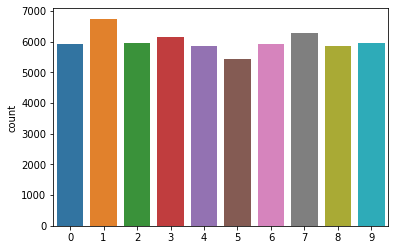

In [0]:
sns.countplot(y_train)

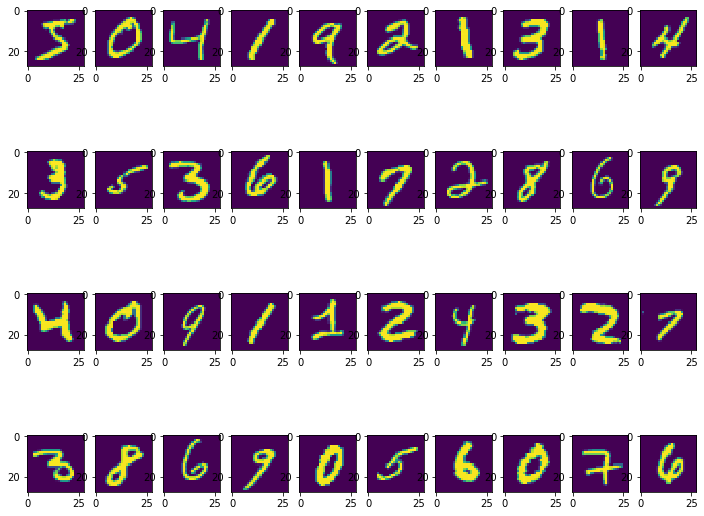

In [0]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

**Scale the values of train and test between 0 & 1 by dividing train & test by 255**<br>
**AND**<br>
**Reshape the data** 

In [0]:
# Normalizing the input
X_train= X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_train/=255.0
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_test = X_test.astype('float32')
X_test/=255.0

In [0]:
print(X_train.shape)

(60000, 28, 28, 1)


In [0]:
X_train[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980395],
       [0.7176471 ],
       [0.99215686],
       [0.99215686],
       [0.8117647 ],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

In [0]:
print(X_test.shape)

(10000, 28, 28, 1)


***Displaying first 25 images from the training dataset and display the labels along with them !***

In [0]:
class_names = ['Zero','One', 'Two', 'Three', 'Four', 'Five',
               'Six', 'Seven', 'Eight', 'Nine']

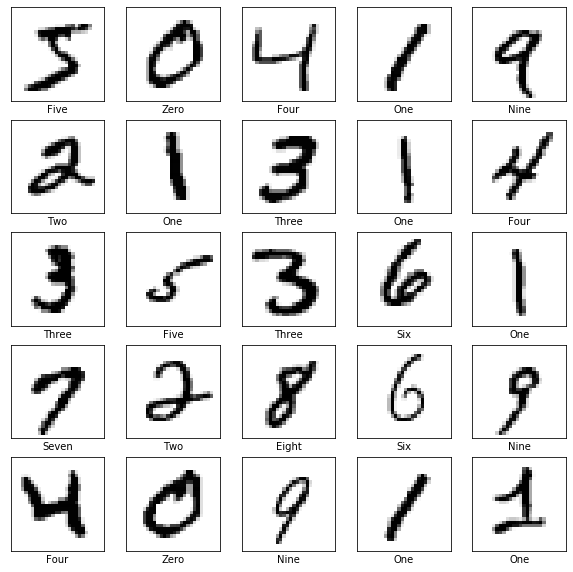

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

***Print the label for first image and after converting it to categorical***



In [0]:
from  keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)

In [0]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


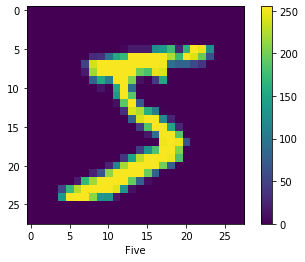

In [0]:
plt.figure()
plt.imshow(X_train[0])
plt.xlabel(class_names[y_train[0]])
plt.colorbar()
plt.grid(False)
plt.show()

#**A. Building basic Single Layer Perceptron on the MNIST Data**




In [0]:
from tensorflow import keras

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='RMSPROP',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs=50,batch_size=5000)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.9823 - acc: 0.7018
Epoch 2/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4248 - acc: 0.8805
Epoch 3/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3462 - acc: 0.8998
Epoch 4/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2968 - acc: 0.9137
Epoch 5/50
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2453 - acc: 0.9314
Epoch 6/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2339 - acc: 0.9315
Epoch 7/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2127 - acc: 0.9376
Epoch 8/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1836 - acc: 0.9475
Epoch 9/50
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1779 - acc: 0.9467
Epoch 10/50
60000/60000 [==============================] - 

In [0]:
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

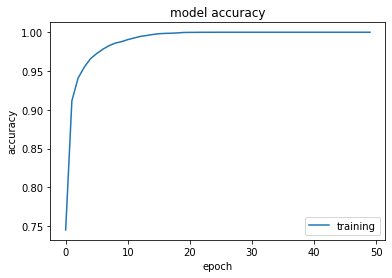

Test loss: 0.082
Test accuracy: 0.979


In [0]:
#Plot It !
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

#**B. Build basic Multilayer Perceptron on the MNIST Data**

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs=50,batch_size=5000)

Epoch 1/50
60000/60000 [==============================] - 10s 172us/step - loss: 0.9377 - acc: 0.7415
Epoch 2/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.3338 - acc: 0.9029
Epoch 3/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.2158 - acc: 0.9379
Epoch 4/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.1636 - acc: 0.9524
Epoch 5/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.1285 - acc: 0.9635
Epoch 6/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.1016 - acc: 0.9707
Epoch 7/50
60000/60000 [==============================] - 9s 149us/step - loss: 0.0819 - acc: 0.9769
Epoch 8/50
60000/60000 [==============================] - 9s 149us/step - loss: 0.0667 - acc: 0.9809
Epoch 9/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.0540 - acc: 0.9848
Epoch 10/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.0442 - 

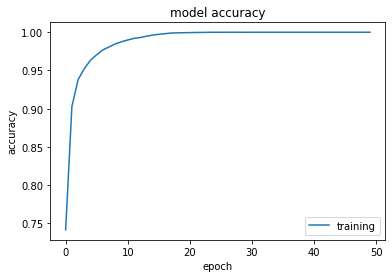

Test loss: 0.082
Test accuracy: 0.979


In [0]:
#Plot It !
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

#**C. Build basic Convolution neural network on the MNIST Data.**

In [0]:
from keras.models import Sequential
import keras as keras
classifier = Sequential()

In [0]:
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D
from keras.layers import Conv2D, BatchNormalization

In [0]:
classifier.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
BatchNormalization(axis=-1) #Axis -1 is always the features axis
classifier.add(Activation('relu'))
 
classifier.add(Conv2D(32, (3,3)))
BatchNormalization(axis=-1)
classifier.add(Activation('relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
BatchNormalization(axis=-1)

classifier.add(Conv2D(64, (3,3)))
BatchNormalization(axis=-1)
classifier.add(Activation('relu'))

classifier.add(Conv2D(64, (3,3)))
classifier.add(Activation('relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Flatten())

BatchNormalization()
classifier.add(Dense(512))
BatchNormalization()
classifier.add(Activation('relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(10))
classifier.add(Activation('softmax'))
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 10, 10, 64)       

In [0]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# applying transformation to image
train_gen = ImageDataGenerator(rotation_range=8, 
                               width_shift_range=0.08, 
                               shear_range=0.3, 
                               height_shift_range=0.08, 
                               zoom_range=0.08 )
test_gen = ImageDataGenerator()

In [0]:
training_set= train_gen.flow(X_train, y_train, batch_size=64)
test_set= train_gen.flow(X_test, y_test, batch_size=64)

In [0]:
history=classifier.fit_generator(training_set, 
                         steps_per_epoch=60000//64, 
                         validation_data= test_set, 
                         validation_steps=10000//64, 
                         epochs=5)

Epoch 1/5
937/937 [==============================] - 175s 186ms/step - loss: 0.2033 - acc: 0.9358 - val_loss: 0.0654 - val_acc: 0.9793
Epoch 2/5
937/937 [==============================] - 174s 185ms/step - loss: 0.0603 - acc: 0.9806 - val_loss: 0.0439 - val_acc: 0.9855
Epoch 3/5
937/937 [==============================] - 174s 185ms/step - loss: 0.0462 - acc: 0.9861 - val_loss: 0.0345 - val_acc: 0.9880
Epoch 4/5
937/937 [==============================] - 174s 185ms/step - loss: 0.0394 - acc: 0.9879 - val_loss: 0.0233 - val_acc: 0.9929
Epoch 5/5
937/937 [==============================] - 174s 186ms/step - loss: 0.0355 - acc: 0.9891 - val_loss: 0.0298 - val_acc: 0.9909


#**Plot It !**

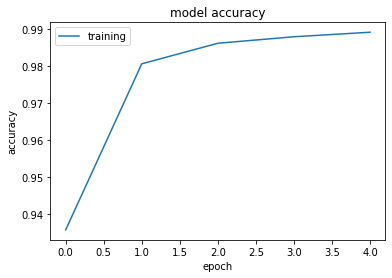

Test loss: 0.082
Test accuracy: 0.979


In [0]:
#Plot It !
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

**B. Save the model into Json and .h5 file**




In [0]:
import os
os.makedirs('./model', exist_ok=True)
classifier.save('./model/mnist_model.h5')

In [0]:
!pip install jsonlib

  Using cached https://files.pythonhosted.org/packages/7c/55/19c29fd79dfb5d42f4568feedc5a286d01d0683a372c1e19024531576508/jsonlib-1.6.1.tar.gz
  ERROR: Failed building wheel for jsonlib
  Running setup.py clean for jsonlib
Failed to build jsonlib
    Running setup.py install for jsonlib ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-xdh8tjtu/jsonlib/setup.py'"'"'; __file__='"'"'/tmp/pip-install-xdh8tjtu/jsonlib/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-_zlng2s5/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [0]:
import json
# serialize model to JSON
model_json = classifier.to_json()
with open("./model/mnist_model.json", "w") as json_file:
    json_file.write(model_json)

**C. Load the model from Disk**

In [0]:
from keras.models import model_from_json
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
# load json and create model
json_file = open('./model/mnist_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./model/mnist_model.h5")
print("Loaded model from disk")
# load the model we saved

classifier.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

Loaded model from disk



```
 T H A N K Y O U !
```

